# Multi-layer Neural Network

In this tutorial we will discuss a powerful method to solve supervised learning problems. We will mainly focus on the theoretical parts in a deeper level to understand the most important aspects of neural networks which will be the basis for understanding deep learning methods.

![mlp_architecture](images/mlp.png)

## A case study on MNIST

In [1]:
%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
from multilayer_nn import mlp, activations, losses, regularizers, initializers, optimizers
from pckutils import mnist, utils
import numpy as np
from matplotlib import pyplot as plt
import os

### Loading MNIST data

In [3]:
url_train_image = "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"
url_train_label = "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz"
url_test_image = "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz"
url_test_label = "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"

In [4]:
# download packages if it was not downloaded
train_imgs_file_name = "data/training_mnist_imgs.gz"
train_lbls_file_name = "data/training_mnist_lbls.gz"
test_imgs_file_name = "data/test_mnist_imgs.gz"
test_lbls_file_name = "data/test_mnist_lbls.gz"

# checking if a file exists
train_I = os.path.exists(train_imgs_file_name)
train_L = os.path.exists(train_lbls_file_name)
test_I = os.path.exists(test_imgs_file_name)
test_L = os.path.exists(test_lbls_file_name)

if not train_I:
    mnist.download(url_train_image, train_imgs_file_name)
    mnist.unzip(train_imgs_file_name)
    print("train_I done.")
    
if not train_L:
    mnist.download(url_train_label, train_lbls_file_name)
    mnist.unzip(train_lbls_file_name)
    print("train_L done.")
    
if not test_I:
    mnist.download(url_test_image, test_imgs_file_name)
    mnist.unzip(test_imgs_file_name)
    print("test_I done.")
    
if not test_L:
    mnist.download(url_test_label, test_lbls_file_name)
    mnist.unzip(test_lbls_file_name)
    print("test_L done.")

In [5]:
# load in the images and labels
train_imgs_file_name = "data/training_mnist_imgs.mnist"
train_lbls_file_name = "data/training_mnist_lbls.mnist"
test_imgs_file_name = "data/test_mnist_imgs.mnist"
test_lbls_file_name = "data/test_mnist_lbls.mnist"

# training images
mgb, num_train_imgs, rows, cols, x_train_s = mnist.read_img(train_imgs_file_name)
assert mgb == 2051, "Wrong magic number when training images were loaded!"

# training labels (number of labels are the same as number of images)
mgb, _, y_train_s = mnist.read_label(train_lbls_file_name)
assert mgb == 2049, "Wrong magic number when training labels were loaded!"

# test images (test image size is the same)
mgb, num_test_imgs, _, _, x_test_s = mnist.read_img(test_imgs_file_name)
assert mgb == 2051, "Wrong magic number when test images were loaded!"

# test labels
mgb, _, y_test_s = mnist.read_label(test_lbls_file_name)
assert mgb == 2049, "Wrong magic number when test labels were loaded!"

2051 60000 28 28
Reading images: [100%]
2049 60000
Reading labels: [100%]
2051 10000 28 28
Reading images: [100%]
2049 10000
Reading labels: [100%]


In [6]:
# add bias to x and one-hot encode y
X = utils.add_bias_to_vectors(utils.scale(x_train_s, 1/255.0))
Y = utils.one_hot_encode(y_train_s, 10)

### Create the neural network

In [7]:
loss = losses.CrossEntropy()
initializer = initializers.Xavier()
regularizer = regularizers.ZeroRegularizer()
optimizer = optimizers.SGD(0.1)

In [8]:
nn = mlp.Mlp(optimizer, loss, initializer, regularizer)

In [9]:
nn.add_layer(20, input_length=28*28+1, activation=activations.Relu())
nn.add_layer(10, activation=activations.Softmax())

In [10]:
# callback for gathering the error rates during training
history = {'errors': [], 'losses': []}
def performance_monitor(batch_y_p, batch_y, loss, ep, itr):
    if itr % 2 == 0:
        history['losses'].append(loss)
        err = utils.error_rate(batch_y_p, batch_y)
        history['errors'].append(err)

In [11]:
nn.fit(X, Y, 20, 6000, verbose=True, callback=performance_monitor)

Iterating: [99%]


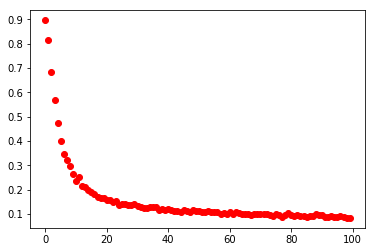

In [12]:
iterations = [i for i in range(len(history['errors']))]
plt.plot(iterations, history['errors'], 'ro')
plt.show()

In [13]:
# calculating error rate on the test set
X_test = utils.add_bias_to_vectors(utils.scale(x_test_s, 1/255.0))
Y_test = utils.one_hot_encode(y_test_s, 10)
y_p = nn.predict_batch(X_test, 'onehot')

error_rate = utils.error_rate(y_p, Y_test) * 100

print('The error rate: %.2f%%' %error_rate)

The error rate: 8.44%
